
## Proyecto 12 - cadena de gimnasios 

La cadena de gimnasios Model Fitness está desarrollando una estrategia de interacción con clientes basada en datos analíticos.

Uno de los problemas más comunes que enfrentan los gimnasios y otros servicios es la pérdida de clientes. ¿Cómo descubres si un/a cliente ya no está contigo? Puedes calcular la pérdida en función de las personas que se deshacen de sus cuentas o no renuevan sus contratos. Sin embargo, a veces no es obvio que un/a cliente se haya ido: puede que se vaya de puntillas.

Los indicadores de pérdida varían de un campo a otro. Si un usuario o una usuaria compra en una tienda en línea con poca frecuencia, pero con regularidad, no se puede decir que ha huido. Pero si durante dos semanas no ha abierto un canal que se actualiza a diario, es motivo de preocupación: es posible que tu seguidor o seguidor/a se haya aburrido y te haya abandonado.

En el caso de un gimnasio, tiene sentido decir que un/a cliente se ha ido si no viene durante un mes. Por supuesto, es posible que estén en Cancún y retomen sus visitas cuando regresen, pero ese no es un caso típico. Por lo general, si un/a cliente se une, viene varias veces y luego desaparece, es poco probable que regrese.

Con el fin de combatir la cancelación, Model Fitness ha digitalizado varios de sus perfiles de clientes. Tu tarea consiste en analizarlos y elaborar una estrategia de retención de clientes.

# Procesamiento de datos

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.model_selection as train_test_split
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [118]:
data = pd.read_csv('gym_churn_us.csv')

In [119]:
print(data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [120]:
data.rename(columns=str.lower, inplace=True)
data.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [121]:
#Se revisa si hay valores nulos
data.isna().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

In [122]:
#Se revisa si hay valores duplicados
data.duplicated().sum()

0

# Exploracion de datos

In [123]:
#caracteristicas del dataset
data.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [124]:
# Caracteristicas entre usarios que abandonaron y que permanecieron
data.groupby("churn").mean()


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


c:\Users\janto\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


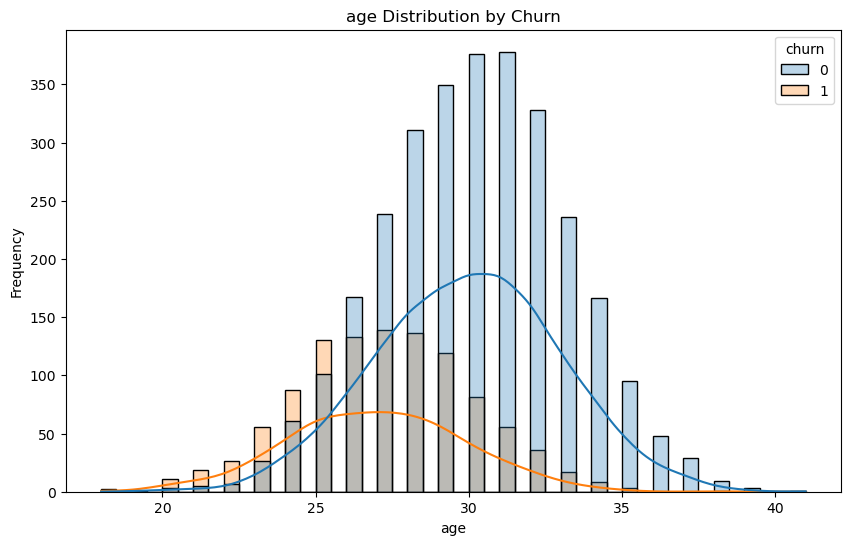

c:\Users\janto\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


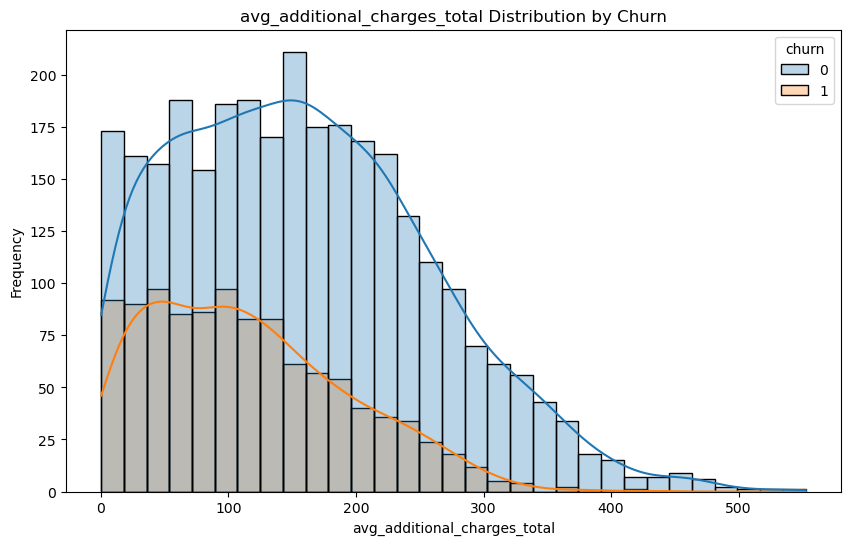

c:\Users\janto\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


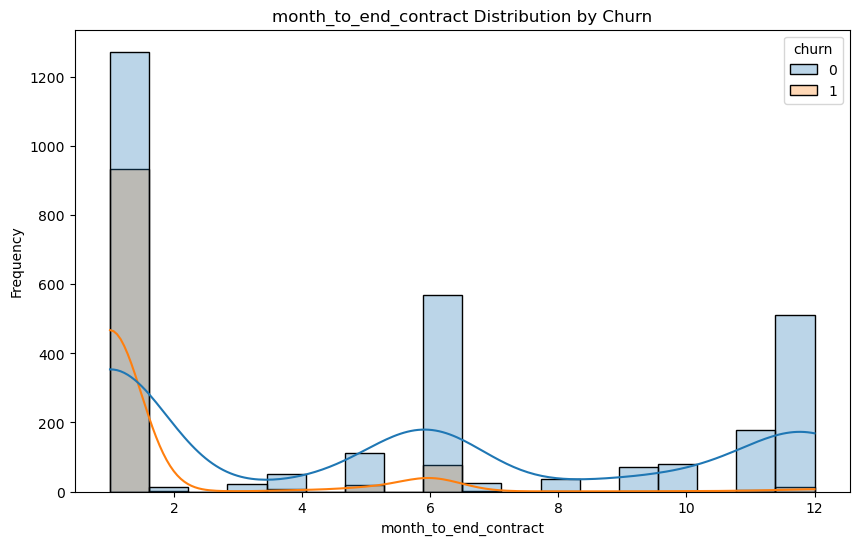

c:\Users\janto\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


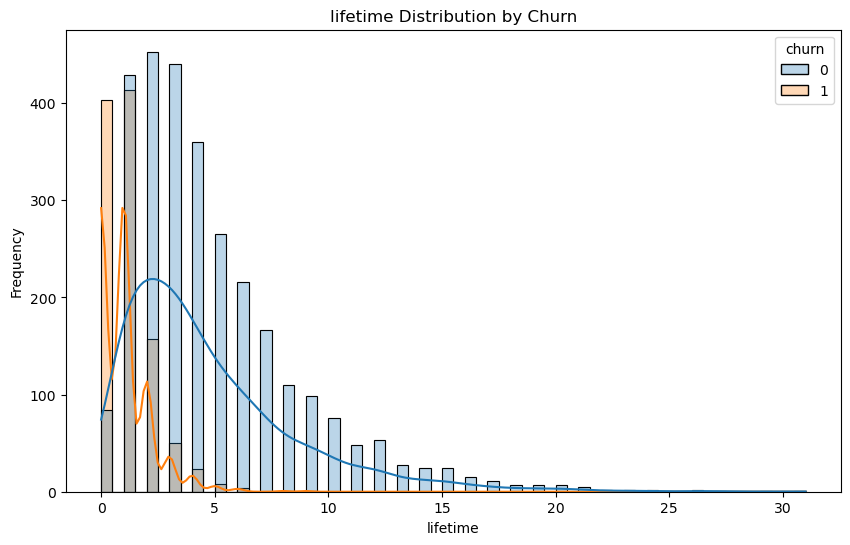

c:\Users\janto\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


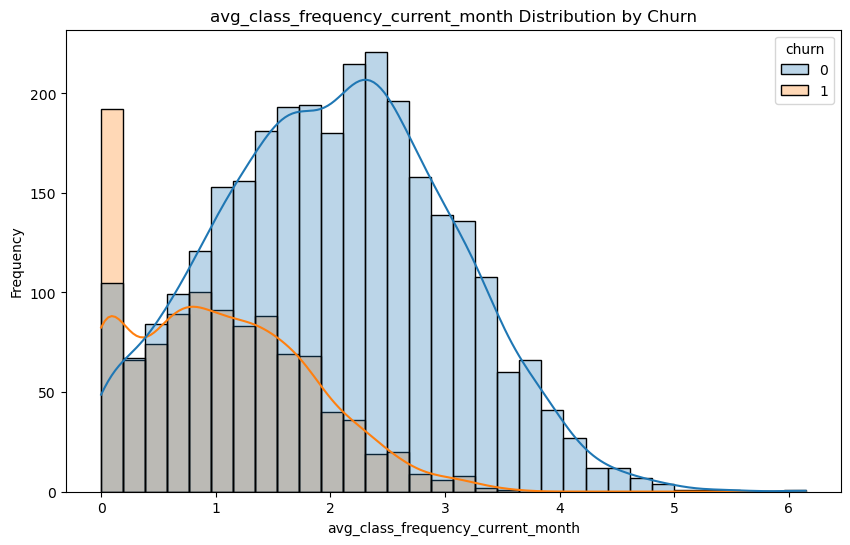

c:\Users\janto\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


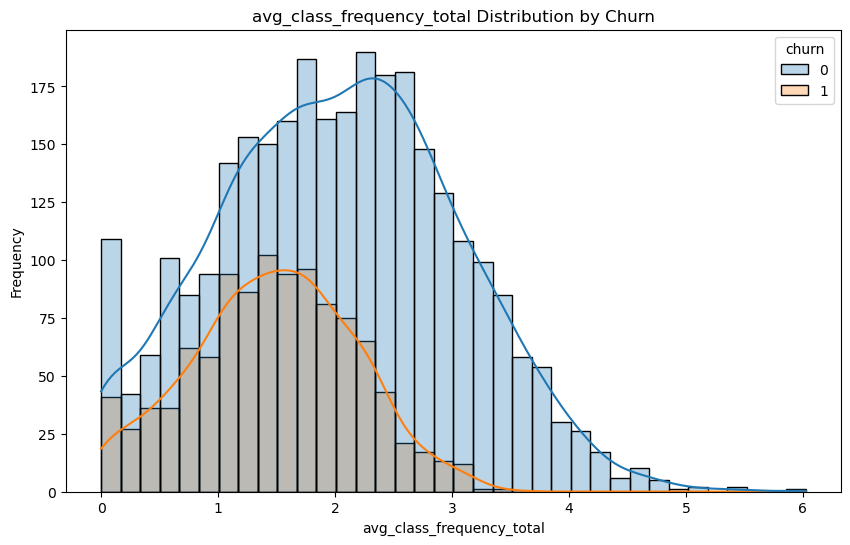

In [125]:
#Edad por grupo
columnas = ['age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_current_month', 'avg_class_frequency_total']

# Plotting histograms
for column in columnas:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=data, x=column, hue='churn', alpha=.3, kde=True)
    plt.title(f'{column} Distribution by Churn')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

En las graficas se puede ver que 

-La mayoria de clientes que se quedan tiene a tener 30 anos mientras que la mayoría de los que se van tiende a tener 27 anos

-Los clientes quie se quedan normalmente tienen mas cargos adicionales que los que se van

-La mayoría de los usuarios que se van tienden a hacerlo durante los primeros cinco meses

-Los usuarios que se van suelen ir una vez por semana en promedio 


In [127]:
correlation = data.corr()

correlation

# Crear un mapa de calor para la matriz de correlación


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


<Axes: >

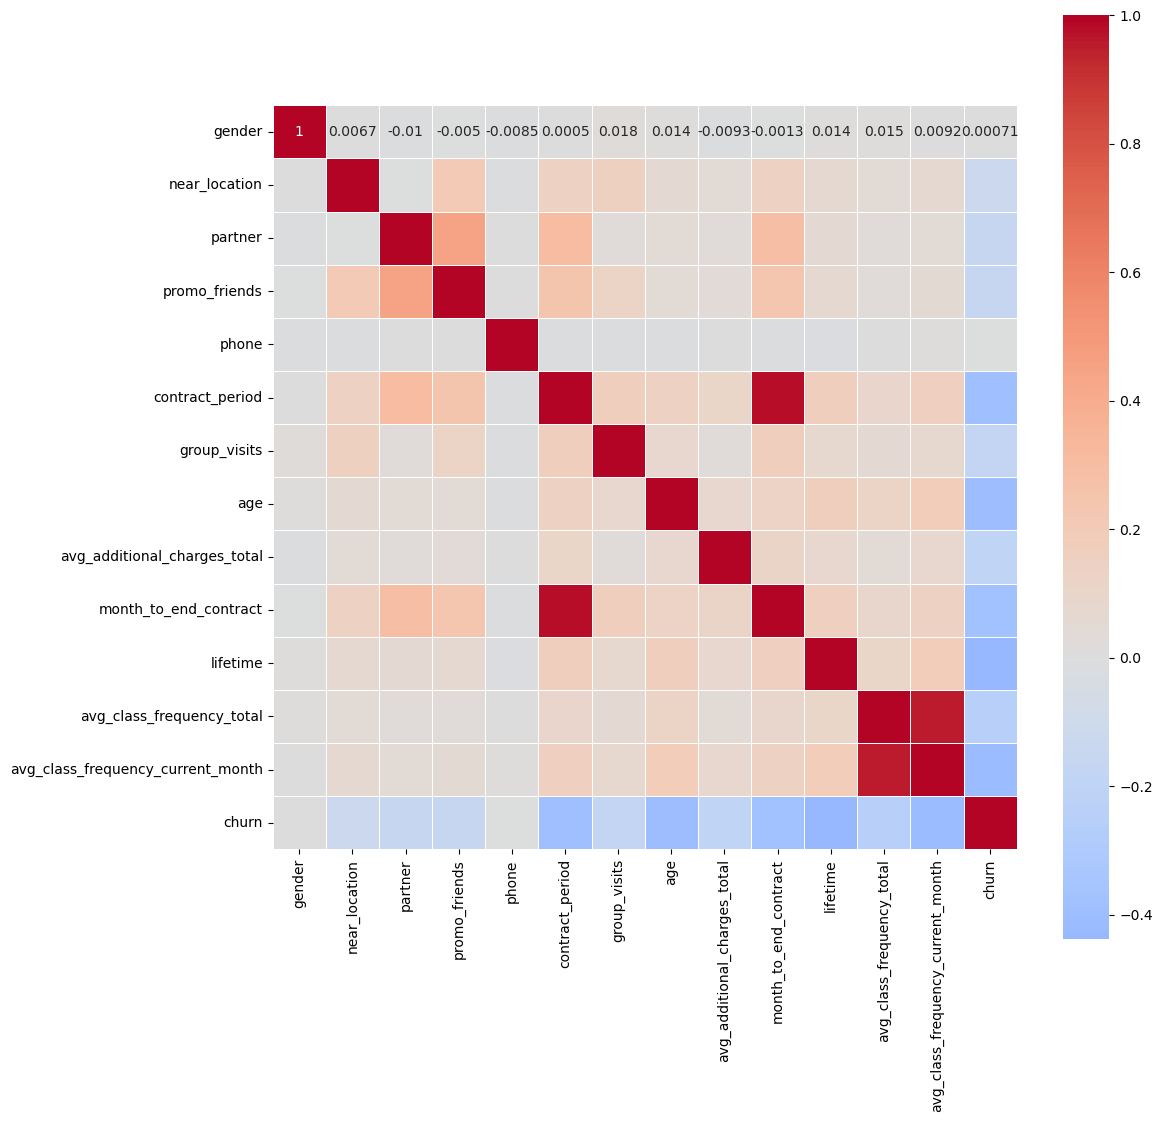

In [128]:


# Crear un mapa de calor para la matriz de correlación
plt.figure(figsize=(12, 12))

sns.heatmap(correlation, annot= True, cmap='coolwarm',  center=0, square= True, linewidths=0.5)


# Modelo para predecir la cancelacion de usuarios

In [129]:
# Separar las características y la variable objetivo
X = data.drop('churn', axis=1)
y = data['churn']

# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de Regresión Logística
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Hacer predicciones
y_pred_log_reg = log_reg.predict(X_val)


rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

# Hacer predicciones
y_pred_rf_clf = rf_clf.predict(X_val)


accuracy_log_reg = accuracy_score(y_val, y_pred_log_reg)
precision_log_reg = precision_score(y_val, y_pred_log_reg)
recall_log_reg = recall_score(y_val, y_pred_log_reg)

print(f"Regresión Logística - Exactitud: {accuracy_log_reg}, Precisión: {precision_log_reg}, Recall: {recall_log_reg}")



# Calcular métricas
accuracy_rf_clf = accuracy_score(y_val, y_pred_rf_clf)
precision_rf_clf = precision_score(y_val, y_pred_rf_clf)
recall_rf_clf = recall_score(y_val, y_pred_rf_clf)

print(f"Bosque Aleatorio - Exactitud: {accuracy_rf_clf}, Precisión: {precision_rf_clf}, Recall: {recall_rf_clf}")

Regresión Logística - Exactitud: 0.91625, Precisión: 0.8729281767955801, Recall: 0.7821782178217822
Bosque Aleatorio - Exactitud: 0.91, Precisión: 0.8494623655913979, Recall: 0.7821782178217822


Se puede ver que la exactitud y recall son similares en ambas sin embargo en presicion la regresion logistica resulto mejor por lo que seria el mejor modelo


# Creacion de clusters de usuarios

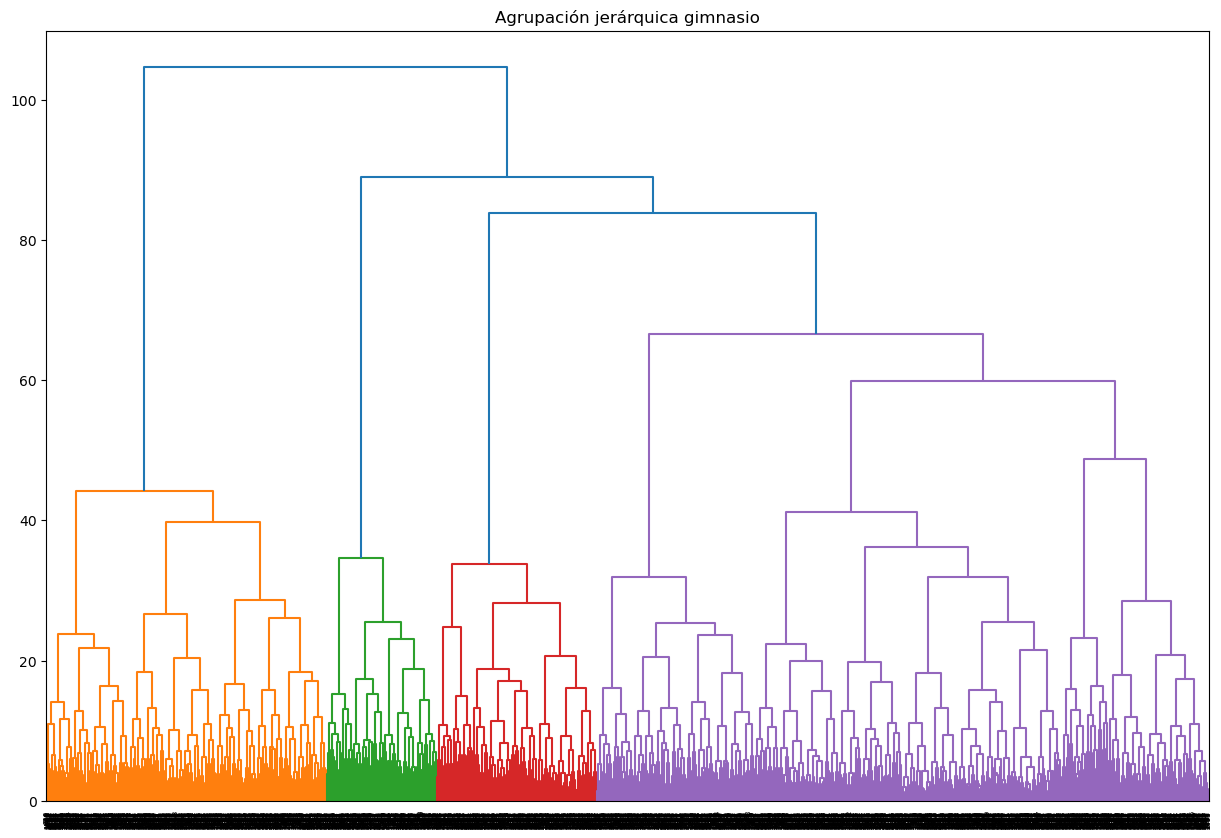

In [130]:
# Estandarizacion de datos
scaler= StandardScaler()
x_sc= scaler.fit_transform(data.drop(columns= ['churn']))
linked= linkage(x_sc, method= 'ward')


plt.figure(figsize= (15,10))
dendrogram(linked, orientation= 'top')
plt.title('Agrupación jerárquica gimnasio')
plt.show()

In [131]:
km = KMeans(n_clusters= 5)
labels= km.fit_predict(x_sc)

    
data['cluster_km']= labels 

   
data.groupby(['cluster_km']).mean()

c:\Users\janto\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.496047,0.000000,0.462451,0.079051,1.000000,2.359684,0.217391,28.480237,135.685249,2.205534,2.806324,1.663497,1.481161,0.442688
1,0.502988,0.959163,0.782869,0.572709,1.000000,10.918327,0.545817,29.987052,160.820598,9.979084,4.749004,1.977767,1.970169,0.027888
2,0.556206,0.977752,0.366511,0.245902,0.998829,2.667447,0.467213,30.117096,161.210450,2.460187,4.914520,2.837595,2.834914,0.067916
3,0.486811,1.000000,0.346123,0.232614,1.000000,1.956835,0.342126,28.151878,131.540263,1.864109,2.400480,1.242355,1.006292,0.517986
4,0.522078,0.862338,0.470130,0.306494,0.000000,4.787013,0.425974,29.301299,143.957664,4.475325,3.924675,1.847220,1.716369,0.267532


In [132]:
data.groupby(['cluster_km']).mean()['churn']*100

cluster_km
0    44.268775
1     2.788845
2     6.791569
3    51.798561
4    26.753247
Name: churn, dtype: float64

Los grupos mas propensos en irse son el grupo 3 con un 51% mientras que el 0 es el segundo con 44%

Conclusiones

Lo ideal es armar una estrategia pare reducir la tasa de abandono en los grupos que tengan ciertas caracteristicas, en este caso vemos que la gente que se va tiende a no durar tanto en el gimnasio pues vemos que los gruopos nos marcan un tiempo de vida estimado de a lo mucho 4.9 meses y que tambien se caracterizan por ir pocas veces a la semana siendo a lo mucho 2.8 dias, esto hace pensar que no hay un buen onboarding al gym, por lo que una estrategia adecuada es ofertar descuento los primeros 5 meses con un coach personalizado o incluso descuentos en cargos adicionales, esto hara que de un inicio se sientan acompanados con la guia para despues ellos puedan seguir continuando quizas despues del mes 5 ya solos, pues a partir de ese mes es poco probable que abandonen